In [1]:
import os
import ast
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Set up graph
matplotlib.rcParams.update({'font.size': 11})

## Load data

In [3]:
#Load calibration dataset
with open(r'..\Calibration_and_measurement_uncertainty\Data\Calibration\raw_data_20210609_120156.txt', 'r') as f:
    data = f.read().splitlines()

    for line_no, line in enumerate(data):
        if line == 'Pitch angle calibration':
            starty = line_no
        elif line == 'Yaw angle calibration':
            startx = line_no

    print('Pitch calibration starts from line {} in the datset\n'
          'Yaw calibration starts from line {} in the dataset'
          .format(starty, startx))

    peak = []
    for i in range(len(data)):
        if data[i].startswith('[['):
            data_list = ast.literal_eval(data[i]) #Convert a string of list to a list
            data_array = np.array(data_list)
            peak.append(data_array)

    peak = np.array(peak)
    peak = np.concatenate(peak, axis = 0)

Pitch calibration starts from line 2 in the datset
Yaw calibration starts from line 75 in the dataset


In [4]:
#Load drift datasets
df = pd.read_csv(r'..\Drift\Data\autocollimator_drift_data_20210810_133916.txt', delimiter = ',', skipinitialspace = True, skiprows = 2)
t_max = df['Time (s)'].max()

df_aircon = df.copy()
df_aircon = df_aircon[df_aircon['Time (s)'] <= (43.0 * 3600.0)]
df_aircon['Time (s)'] = df_aircon['Time (s)'] - df_aircon['Time (s)'].iloc[0]

df_ambient = df.copy()
df_ambient = df_ambient[df_ambient['Time (s)'] >= (t_max - (43.0 * 3600.0))]
df_ambient['Time (s)'] = df_ambient['Time (s)'] - df_ambient['Time (s)'].iloc[0]

df_box = pd.read_csv(r'..\Drift\Data\autocollimator_drift_data_20220314_172858.txt', delimiter = ',', skipinitialspace = True, skiprows = 2)
df_box = df_box[df_box['Time (s)'] > (24.0 * 3600.0)]
df_box['Time (s)'] = df_box['Time (s)'] - df_box['Time (s)'].iloc[0]

## Pixel locking

In [5]:
def pixel_locking_plot(x, y, filename):
    n_bins = 30

    pixel_locking_x = x % 1.0
    pixel_locking_y = y % 1.0

    fig, ax = plt.subplots(1, 2, figsize = (5.76, 2.16))

    ax[0].hist(pixel_locking_x, bins = n_bins)
    ax[1].hist(pixel_locking_y, bins = n_bins)

    ax[0].set_xlabel('Fraction of a pixel (px)')
    ax[0].set_ylabel('Counts')
    ax[1].set_xlabel('Fraction of a pixel (px)')
    ax[1].set_ylabel('Counts')

    ax[0].set_xlim(0.0, 1.0)
    ax[0].set_xticks(np.arange(0.0, 1.2, 0.2))
    ax[1].set_xlim(0.0, 1.0)
    ax[1].set_xticks(np.arange(0.0, 1.2, 0.2))
    ax[0].ticklabel_format(axis = 'y', style = 'sci', scilimits = (0, 3))
    ax[1].ticklabel_format(axis = 'y', style = 'sci', scilimits = (0, 3))

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

In [6]:
x = df_ambient['Peak x position (px)'].copy().values
y = df_ambient['Peak y position (px)'].copy().values

pixel_locking_plot(x, y, 'pixel_locking_ambient.pdf')

print('Drift in x from {:.2f} px to {:.2f} px\n'
      'Drift in y from {:.2f} px to {:.2f} px'
      .format(x.min(), x.max(), y.min(), y.max()))

Drift in x from 855.82 px to 856.98 px
Drift in y from 541.84 px to 542.89 px


In [7]:
x = df_aircon['Peak x position (px)'].copy().values
y = df_aircon['Peak y position (px)'].copy().values

pixel_locking_plot(x, y, 'pixel_locking_aircon.pdf')

print('Drift in x from {:.2f} px to {:.2f} px\n'
      'Drift in y from {:.2f} px to {:.2f} px'
      .format(x.min(), x.max(), y.min(), y.max()))

Drift in x from 855.61 px to 857.17 px
Drift in y from 541.74 px to 543.09 px


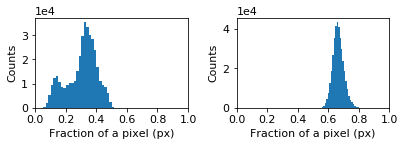

Drift in x from 859.03 px to 859.53 px
Drift in y from 628.54 px to 628.83 px


In [8]:
x = df_box['Peak x position (px)'].copy().values
y = df_box['Peak y position (px)'].copy().values

pixel_locking_plot(x, y, 'pixel_locking_box.pdf')

print('Drift in x from {:.2f} px to {:.2f} px\n'
      'Drift in y from {:.2f} px to {:.2f} px'
      .format(x.min(), x.max(), y.min(), y.max()))

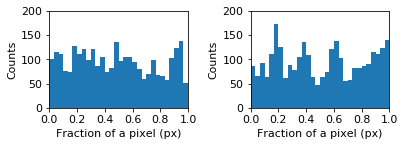

In [9]:
x = peak[:, 0]
y = peak[:, 1]

n_bins = 30

pixel_locking_x = x % 1.0
pixel_locking_y = y % 1.0

fig, ax = plt.subplots(1, 2, figsize = (5.76, 2.16))

ax[0].hist(pixel_locking_x, bins = n_bins)
ax[1].hist(pixel_locking_y, bins = n_bins)

ax[0].set_xlabel('Fraction of a pixel (px)')
ax[0].set_ylabel('Counts')
ax[1].set_xlabel('Fraction of a pixel (px)')
ax[1].set_ylabel('Counts')

ax[0].set_xlim(0.0, 1.0)
ax[0].set_xticks(np.arange(0.0, 1.2, 0.2))
ax[1].set_xlim(0.0, 1.0)
ax[1].set_xticks(np.arange(0.0, 1.2, 0.2))
ax[0].set_ylim(0, 200)
ax[1].set_ylim(0, 200)
ax[0].set_yticks(np.arange(0, 210, 50))
ax[1].set_yticks(np.arange(0, 210, 50))

plt.tight_layout()
plt.savefig('pixel_locking_calibration.pdf')
plt.show()

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))

ax.scatter(x % 1.0, y % 1.0, s = 0.1)

ax.set_xlabel('Fraction of a pixel in x (px)')
ax.set_ylabel('Fraction of a pixel in y (px)')

plt.tight_layout()
plt.show()